# 간단 분석

In [51]:
import pandas as pd

In [52]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./submission.csv")

In [53]:
train.shape, test.shape

((891, 12), (418, 11))

In [54]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* PassengerId : 탑승객의 고유 아이디
* Survival : 생존여부(0: 사망, 1: 생존)
* Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
* Name : 이름
* Sex : 성별
* Age : 나이
* Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
* Parch: 함께 탑승한 부모, 자식의 수
* Ticket: 티켓번호
* Fare: 티켓의 요금
* Cabin: 객실번호
* Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,596
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,49
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,472


In [82]:
train['Sex'] = train['Sex'].replace('male', 0)
train['Sex'] = train['Sex'].replace('female', 1)
train['Embarked'] = train['Embarked'].replace('C', 0)
train['Embarked'] = train['Embarked'].replace('Q', 1)
train['Embarked'] = train['Embarked'].replace('S', 2)


test['Sex'] = test['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('female',1)
test['Embarked'] = test['Embarked'].replace('C', 0)
test['Embarked'] = test['Embarked'].replace('Q', 1)
test['Embarked'] = test['Embarked'].replace('S', 2)

In [83]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013166
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.164681
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.110320
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.032565
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068900
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.040449
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.032565,0.068900,0.040449,-0.226311,1.000000


In [84]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 컬럼별 분석

### PassengerId

In [86]:
len(train['PassengerId'].unique())

891

passengerId는 학습 데이터로 사용하기 무의미

### Name

In [87]:
len(train['Name'].unique())

891

name은 학습 데이터로 사용하기 무의미

### Ticket

In [101]:
train.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [96]:
len(train['Ticket'].unique())

681

In [102]:
train['Ticket2'] = train['Ticket'].astype('category').cat.codes

In [103]:
train.corrwith(train['Ticket2'])

PassengerId   -0.056554
Survived      -0.164549
Pclass         0.319869
Sex           -0.059372
Age           -0.075934
SibSp          0.079461
Parch          0.020003
Fare          -0.013885
Embarked       0.000284
Ticket2        1.000000
dtype: float64

<AxesSubplot:>

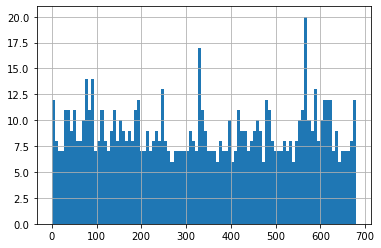

In [110]:
train['Ticket2'].hist(bins=100)

In [113]:
len(set(train.Ticket).intersection(test.Ticket))

115

ticket의 경우 Pclass와의 어느 정도 상관관계를 가진다는 점은 주목할만 하지만,  
test에 존재하는 ticket number와의 교집합 수가 적기 때문에 학습 데이터로 사용하기 어렵다고 판단

### Pclass

Pclass
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
3    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

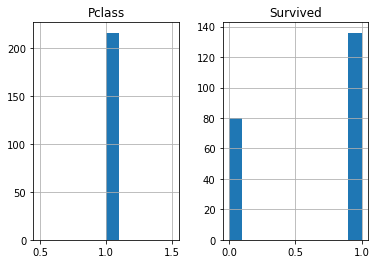

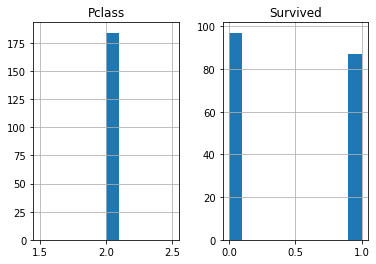

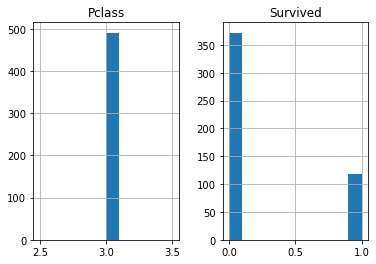

In [88]:
train[['Pclass', 'Survived']].groupby('Pclass').hist()

### Sex

Sex
0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

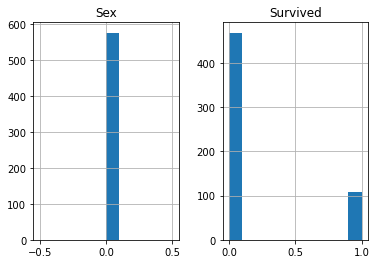

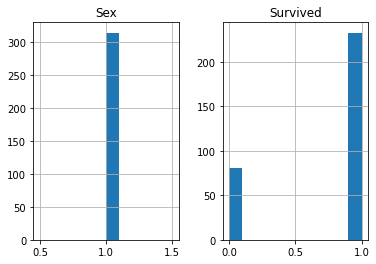

In [89]:
train[['Sex', 'Survived']].groupby('Sex').hist()

### Age

<AxesSubplot:>

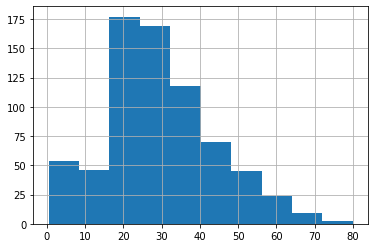

In [90]:
train.Age.hist()

In [91]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [123]:
train.corrwith(train['Age'])

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Sex           -0.093254
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Embarked      -0.032565
Ticket2       -0.075934
Cabin2         0.167432
dtype: float64

In [138]:
train[['Age', 'Pclass', 'SibSp', 'Parch']].groupby('Age').count()

,Pclass,SibSp,Parch
Age,,,
0.42,1,1,1
0.67,1,1,1
0.75,2,2,2
0.83,2,2,2
0.92,1,1,1
...,...,...,...
70.00,2,2,2
70.50,1,1,1
71.00,2,2,2


In [117]:
train.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

age는 결측치가 너무 많아서, 이를 어떻게 해결해야 할지 고민해야함. 제외해야 할 수도 있음  
또, Plcass와 작지 않은 상관관계를 보이긴하지만 예상외로 Survived와 큰 관계가 없어보임

### Fare

<AxesSubplot:>

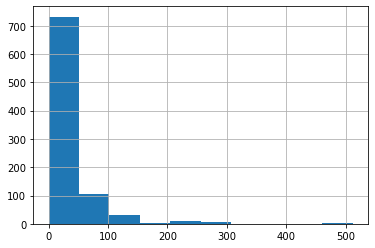

In [92]:
train.Fare.hist()

<AxesSubplot:>

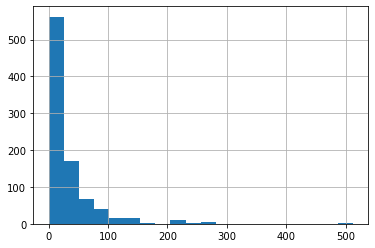

In [95]:
train.Fare.hist(bins=20)

In [122]:
train.corrwith(train['Fare'])

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Sex            0.182333
Age            0.096067
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Embarked      -0.226311
Ticket2       -0.013885
Cabin2         0.310987
dtype: float64

fare의 경우, Pclass와 매우 높은 상관관계를 가지며, Embarked와 Survived와도 매우 높은 상관관계를 가짐

### Cabin

In [119]:
train['Cabin2'] = train['Cabin'].astype('category').cat.codes

In [121]:
train.corrwith(train['Cabin2'])

PassengerId   -0.000637
Survived       0.276235
Pclass        -0.537419
Sex            0.137704
Age            0.167432
SibSp         -0.024829
Parch          0.033585
Fare           0.310987
Embarked      -0.070225
Ticket2       -0.176515
Cabin2         1.000000
dtype: float64

In [125]:
train.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

cabin의 경우 Survived와 Pclass와 높은 관계를 보임. 그치만 결측치가 매우 많아서 없애야 될 정보로 간주될 수 있긴함.  
결측치를 잘 보간할 경우 Survived 예측에 좋은 향상을 보일 것 같음

### Test null value

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


test에도 age와 cabin의 상당수 결측치가 존재함. 이들을 제외한다 할지라도 Fare에서 한개의 결측치가 발생해서 이를 채워줘야 함

In [133]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,2


Fare와 Plcass와의 상관관계가 높으므로 Pclass의 추세를 파악

In [129]:
train[train['Pclass'] == 3]['Fare'].value_counts()

8.0500     43
7.8958     38
7.7500     34
7.9250     18
7.7750     16
           ..
7.5208      1
12.2875     1
22.0250     1
7.6292      1
10.5167     1
Name: Fare, Length: 119, dtype: int64

In [130]:
test[test['Pclass'] == 3]['Fare'].value_counts()

7.7500     21
8.0500     17
7.8958     11
7.7750     10
7.2292      9
           ..
16.7000     1
23.2500     1
25.4667     1
18.0000     1
22.3583     1
Name: Fare, Length: 79, dtype: int64

보통 test의 통계치를 이용하게 되는 일이 주로 있지는 않기 때문에, train의 통계치를 이용하고자 함.  
또한, train 데이터의 최고 빈도 8.0500을 사용해서 채울 것